## Access Mooring Wave Timeseries Delayed QC (Zarr)
This Jupyter notebook demonstrates how to access and plot mooring_wave_timeseries_delayed_qc data, available as [Zarr](https://zarr.dev/) dataset on S3.

🔗 More information about the dataset is available [in the AODN metadata catalogue](https://catalogue-imos.aodn.org.au/geonetwork/srv/eng/catalog.search#/metadata/aaebf991-b79d-4670-a1c5-a0de9bf649ce).

📌 The source of truth for this notebook is maintained on [GitHub](https://github.com/aodn/aodn_cloud_optimised/tree/main/notebooks/mooring_wave_timeseries_delayed_qc.ipynb).


In [1]:
dataset_name = "mooring_wave_timeseries_delayed_qc"

## Install/Update packages and Load common functions

import os, requests, importlib.util

open('setup.py', 'w').write(requests.get('https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/notebooks/setup.py').text)

spec = importlib.util.spec_from_file_location("setup", "setup.py")
setup = importlib.util.module_from_spec(spec)
spec.loader.exec_module(setup)

setup.install_requirements()
setup.load_dataquery()

In [2]:
from DataQuery import GetAodn

# Understanding the Dataset

In [3]:
# remote zarr dataset
aodn = GetAodn()
dname = f'{dataset_name}.zarr'
%time aodn_dataset = aodn.get_dataset(dname)

CPU times: user 462 ms, sys: 59.9 ms, total: 522 ms
Wall time: 1.12 s


In [4]:
ds = aodn_dataset.zarr_store
ds.info()

xarray.Dataset {
dimensions:
	TIME = 11856 ;
	DIR = 90 ;
	FREQUENCY = 64 ;

variables:
	float64 DEPTH(TIME) ;
		DEPTH:ancillary_variables = DEPTH_quality_control ;
		DEPTH:long_name = actual depth ;
		DEPTH:positive = down ;
		DEPTH:reference_datum = sea surface ;
		DEPTH:standard_name = depth ;
		DEPTH:units = m ;
		DEPTH:valid_max = 12000.0 ;
		DEPTH:valid_min = -5.0 ;
	float64 DEPTH_quality_control(TIME) ;
		DEPTH_quality_control:flag_meanings = No_QC_performed Good_data Probably_good_data Bad_data_that_are_potentially_correctable Bad_data Value_changed Not_used Not_used Not_used Missing_value ;
		DEPTH_quality_control:flag_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] ;
		DEPTH_quality_control:long_name = quality flag for depth ;
		DEPTH_quality_control:quality_control_conventions = IMOS standard flags ;
		DEPTH_quality_control:quality_control_global = A ;
		DEPTH_quality_control:quality_control_global_conventions = Argo reference table 2a (see http://www.cmar.csiro.au/argo/dmqc/user_doc

## Plot time coverage

In [5]:
aodn_dataset.get_temporal_extent()

(Timestamp('2014-01-07 05:59:00.000003840'), Timestamp('2017-02-08 21:59:00'))

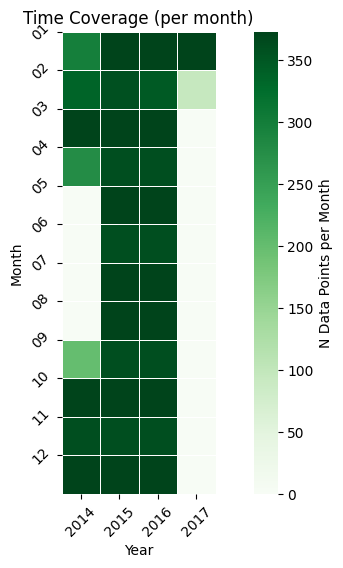

In [6]:
aodn_dataset.plot_time_coverage()

## Read Metadata


In [7]:
metadata = aodn_dataset.get_metadata()
metadata

2025-10-31 11:22:44,246 - aodn.GetAodn - INFO - Retrieving metadata for s3://imos-data-lab-optimised/mooring_wave_timeseries_delayed_qc.zarr


{'global_attributes': {'Conventions': 'CF-1.6,IMOS-1.4',
  'abstract': 'The Queensland and Northern Australia mooring sub-facility is based at the Australian Institute for Marine Science in Townsville.  The sub-facility is responsible for moorings in two geographic regions: Queensland Great Barrier Reef, where four pairs of regional moorings and one National Reference Station are maintained; and Northern Australia, where a National Reference Station and transect of the Timor Sea comprising four regional moorings, are maintained.',
  'acknowledgement': 'Any users of IMOS data are required to clearly acknowledge the source of the material derived from IMOS in the format: "Data was sourced from the Integrated Marine Observing System (IMOS) - IMOS is a national collaborative research infrastructure, supported by the Australian Government." If relevant, also credit other organisations involved in collection of this particular datastream (as listed in \'credit\' in the metadata record).',
  

# Data Query and Plot

In [8]:
ds = aodn_dataset.get_data(date_start='2015-01-01', date_end='2016-01-01')

In [9]:
ds

<xarray.Dataset> Size: 422MB
Dimensions:                (TIME: 4417, DIR: 90, FREQUENCY: 64)
Coordinates:
  * DIR                    (DIR) float32 360B 0.0 4.0 8.0 ... 348.0 352.0 356.0
  * FREQUENCY              (FREQUENCY) float32 256B 0.008301 0.02393 ... 0.9927
    LATITUDE               float64 8B ...
    LONGITUDE              float64 8B ...
    NOMINAL_DEPTH          float64 8B ...
  * TIME                   (TIME) datetime64[ns] 35kB 2015-01-01T01:58:59.999...
Data variables: (12/48)
    DEPTH                  (TIME) float64 35kB ...
    DEPTH_quality_control  (TIME) float64 35kB ...
    SSWV                   (TIME, FREQUENCY, DIR) float64 204MB ...
    SSWV_quality_control   (TIME, FREQUENCY, DIR) float64 204MB ...
    SWPD                   (TIME) float64 35kB ...
    SWPD_quality_control   (TIME) float64 35kB ...
    ...                     ...
    WWPD_quality_control   (TIME) float64 35kB ...
    WWPP                   (TIME) float64 35kB ...
    WWPP_quality_control   (TIME) float64 35kB ...
    WWSH                   (TIME) float64 35kB ...
    WWSH_quality_control   (TIME) float64 35kB ...
    filename               (TIME) object 35kB ...
Attributes: (12/62)
    Conventions:                      CF-1.6,IMOS-1.4
    abstract:                         The Queensland and Northern Australia m...
    acknowledgement:                  Any users of IMOS data are required to ...
    author:                           Australian Institute of Marine Science
    author_email:                     adc@aims.gov.au
    cdm_data_type:                    Station
    ...                               ...
    time_deployment_end_origin:       TimeLastInPos
    time_deployment_start:            2016-07-26T07:32:00Z
    time_deployment_start_origin:     TimeFirstInPos
    title:                            BGF frame deployed Jul 2016
    toolbox_input_file:               /export/imos/BGF/Moorings/20170125_ITF1...
    toolbox_version:                  2.5.35 - GLNXA64

## Plot Wave Significant Height Timeseries

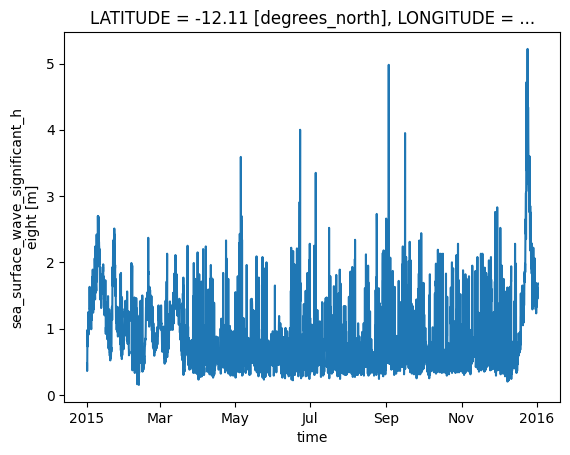

In [10]:
ds.WHTH.plot()

## Plot direction–Frequency Spectrum

Wave energy distribution by direction and frequency at a single time step

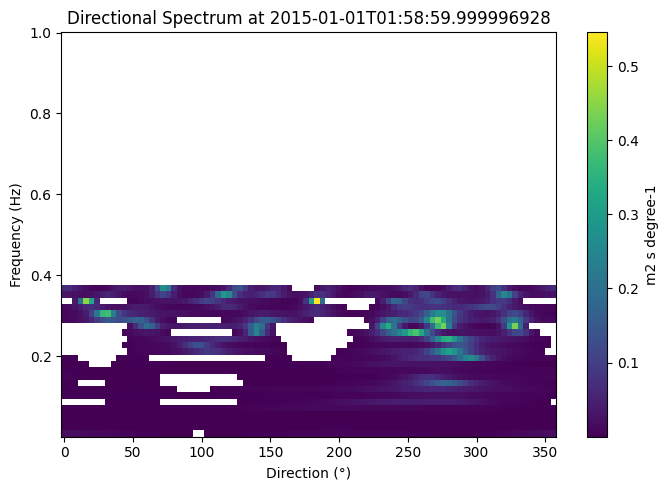

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# select one timestep
t = 0  # or use a datetime index, e.g. ds.sel(TIME='2020-01-01T00:00')
da = ds["SSWV"].isel(TIME=t)

# prepare data
freq = ds["FREQUENCY"].values
dire = ds["DIR"].values

fig, ax = plt.subplots(figsize=(7, 5))
pcm = ax.pcolormesh(dire, freq, da, shading='auto')
plt.colorbar(pcm, ax=ax, label=f"{da.units}")
ax.set_xlabel("Direction (°)")
ax.set_ylabel("Frequency (Hz)")
ax.set_title(f"Directional Spectrum at {str(ds.TIME.values[t])}")
plt.tight_layout()
plt.show()



## Polar Plot (Directional Spectrum in Polar Coordinates)

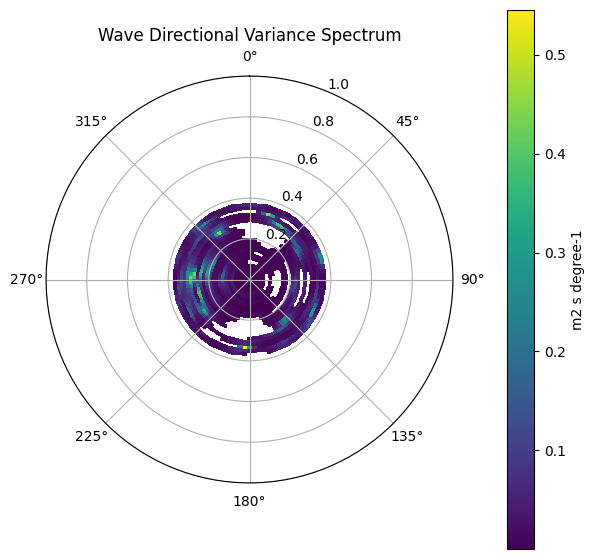

In [12]:
fig = plt.figure(figsize=(7, 7))
ax = plt.subplot(111, polar=True)

# convert to radians and adjust direction (waves usually come *from* direction)
theta = np.deg2rad(ds["DIR"])
r = ds["FREQUENCY"]

# select a single time
da = ds["SSWV"].isel(TIME=0)

pcm = ax.pcolormesh(theta, r, da, shading='auto')
plt.colorbar(pcm, pad=0.1, label=f"{da.units}")
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_title("Wave Directional Variance Spectrum")
plt.show()


## Integrated Spectral Energy Over Time

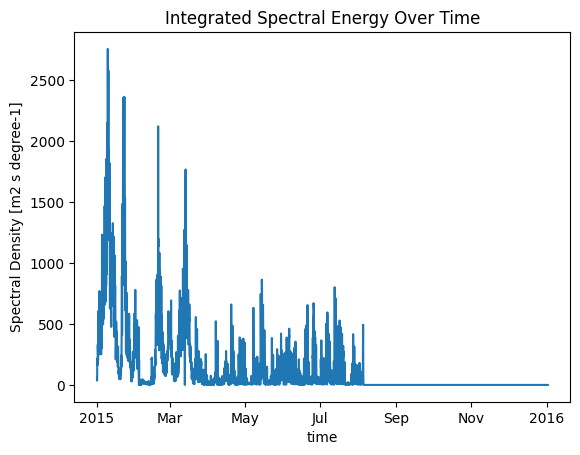

In [13]:
# integrate over frequency and direction
E = ds["SSWV"].sum(dim=["FREQUENCY", "DIR"])

E.plot()
plt.title("Integrated Spectral Energy Over Time")
plt.ylabel(f"Spectral Density [{ds.SSWV.units}]")
plt.show()
